# Workshop 3: Advanced Techniques

In this workshop we will learn techniques to increase the performance of CNN and how to use state of the art architectures. The structure of the workshop will be the following:



1.   Dropout
2.   Batch Normalization
3.   Data Augmentation
4.   Transfer learning



## 1. Dropout

In [2]:
# Import dependence for downloading CIFAR10
from tensorflow import keras
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170498071/170498071 [==============================] - 56s 0us/step


In [4]:
# Import dependence for handling arrays
import numpy as np

In [5]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [6]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [7]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [8]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [9]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [10]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [11]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [11]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer) # Ponemos el porcentaje de neuronas que queremos apagar. Tenemos una capa mas que es la de dropout
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [12]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640  

In [14]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 14s 7ms/step - loss: 1.8212 - accuracy: 0.3188 - val_loss: 1.5862 - val_accuracy: 0.4198
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.5647 - accuracy: 0.4243 - val_loss: 1.4095 - val_accuracy: 0.4866
Epoch 3/50
391/391 [==============================] - 4s 9ms/step - loss: 1.4594 - accuracy: 0.4677 - val_loss: 1.3575 - val_accuracy: 0.5118
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3772 - accuracy: 0.5029 - val_loss: 1.2849 - val_accuracy: 0.5460
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3220 - accuracy: 0.5273 - val_loss: 1.2618 - val_accuracy: 0.5554
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2853 - accuracy: 0.5415 - val_loss: 1.2011 - val_accuracy: 0.5704
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2458 - accuracy: 0.5564 - val_loss: 1.1680 - val_accuracy: 0.5880
Epoch

KeyboardInterrupt: ignored

In [12]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

In [ ]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

## 2. Batch Normalization

In [13]:
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [18]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1) # Se añade a la salida del bloque convolucional. Tenemos varias capas de batch normalization
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

In [ ]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

## 3. Data Augmentation

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)
#ImageDataGenerator tiene muchos posibles parametros. Podemos jugar con esto en el Data Project

In [16]:
# Function to convert a categorical class to its corresponding string
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

In [18]:
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

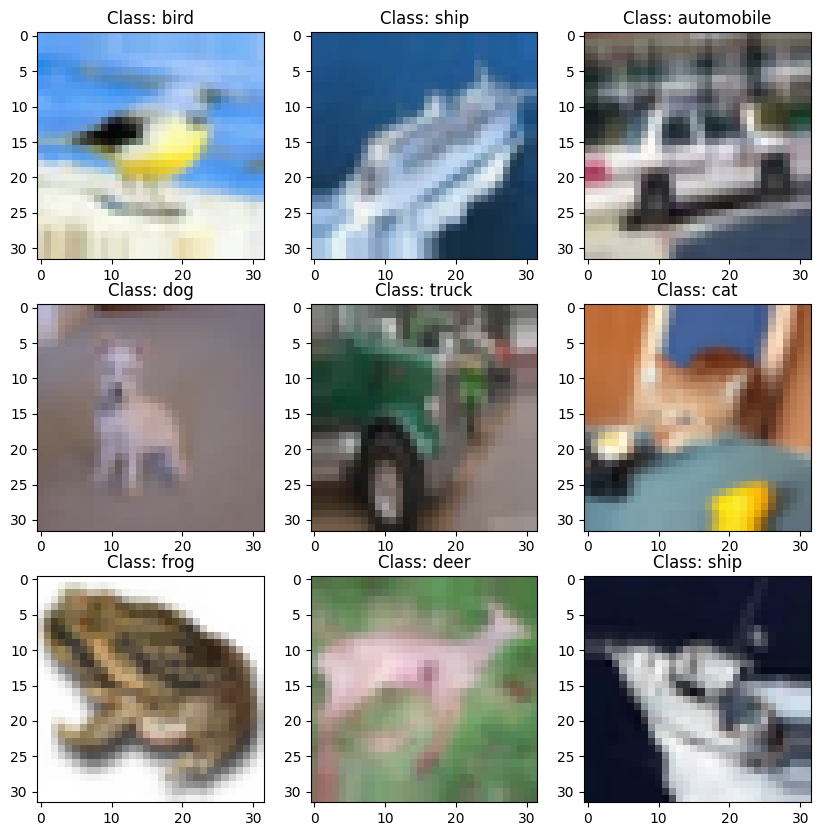

In [19]:
# Show generated data
iterator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=9)
samples, labels = next(iterator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i], interpolation='none')
    class_str = class_to_string(np.argmax(labels[i]))
    plt.title("Class: " + class_str)

In [22]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=20,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

In [ ]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=100,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

## 4. Transfer Learning

In [20]:
# Import dependences for transfer learning
from tensorflow.keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [25]:
# Define the model
resnet_model = ResNet50(weights='imagenet', include_top=False, #Quitamos el conociemiento de la red que no me sirve. Esta tiene 1000 clases y nosotros 10
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2))) # Hace lo contrario al MaxPooiling. Aumenta el tamaño de la imagen x2. Lo hago 3 veces porque mis imagenes son de 32*32 y necesito llegar a 256*256 
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # 10 son las capas de salida que tenemos. En este caso son 10

94765736/94765736 [==============================] - 0s 0us/step


In [26]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', #Learning rte muy bajo porque no quiero cambiar mucho los pesos
              metrics=['acc'])

In [34]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5
1000/1000 [==============================] - 627s 591ms/step - loss: 1.6056 - acc: 0.4392 - val_loss: 1.2488 - val_acc: 0.5516
Epoch 2/5
1000/1000 [==============================] - 591s 591ms/step - loss: 1.0417 - acc: 0.6457 - val_loss: 1.0160 - val_acc: 0.6398
Epoch 3/5
1000/1000 [==============================] - 592s 592ms/step - loss: 0.8444 - acc: 0.7180 - val_loss: 0.8542 - val_acc: 0.7196
Epoch 4/5
1000/1000 [==============================] - 588s 588ms/step - loss: 0.7074 - acc: 0.7666 - val_loss: 0.7917 - val_acc: 0.7262
Epoch 5/5
1000/1000 [==============================] - 592s 592ms/step - loss: 0.5990 - acc: 0.8081 - val_loss: 0.5823 - val_acc: 0.8040


In [35]:
# Train the model
batch_size = 20
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=5,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/5


<ipython-input-35-15bd63b29458>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


2500/2500 [==============================] - 685s 271ms/step - loss: 1.0656 - acc: 0.6594 - val_loss: 0.7899 - val_acc: 0.7396
Epoch 2/5
2500/2500 [==============================] - 677s 271ms/step - loss: 0.9376 - acc: 0.7035 - val_loss: 0.8486 - val_acc: 0.7274
Epoch 3/5
2500/2500 [==============================] - 674s 270ms/step - loss: 0.8842 - acc: 0.7228 - val_loss: 0.7013 - val_acc: 0.7760
Epoch 4/5
  42/2500 [..............................] - ETA: 10:45 - loss: 0.8776 - acc: 0.7298

KeyboardInterrupt: ignored

# FINE-TUNING


Once you have done the previous step, you will have a model that can make predictions on your dataset. Optionally, you can improve its performance through fine-tuning. Fine-tuning is done by unfreezing the base model or part of it and training the entire model again on the whole dataset at a very low learning rate. The low learning rate will increase the performance of the model on the new dataset while preventing overfitting. 

The learning rate has to be low because the model is quite large while the dataset is small. This is a recipe for overfitting, hence the low learning rate. Recompile the model once you have made these changes so that they can take effect. This is because the behavior of a model is frozen whenever you call the compile function. That means that you have to call the compile function again whenever you want to change the model’s behavior. The next step will be to train the model again while monitoring it via callbacks to ensure it does not overfit. 

In [27]:
# Congela las capas de la red pre-entrenada para que no se actualicen durante el entrenamiento:

for layer in resnet_model.layers:
    layer.trainable = False


In [28]:
# Añade las capas adicionales que has definido después de la red pre-entrenada:

model = Sequential()
model.add(UpSampling2D((2, 2)))
model.add(UpSampling2D((2, 2)))
model.add(UpSampling2D((2, 2)))
model.add(resnet_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


In [29]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', #Learning rte muy bajo
              metrics=['acc'])

In [31]:
# Train the model
batch_size = 50
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=10,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

<ipython-input-31-0cd5ebad2fef>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


Epoch 1/10
1000/1000 [==============================] - 221s 221ms/step - loss: 1.7352 - acc: 0.3800 - val_loss: 1.3883 - val_acc: 0.5140
Epoch 2/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.5765 - acc: 0.4411 - val_loss: 1.3228 - val_acc: 0.5330
Epoch 3/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.5175 - acc: 0.4676 - val_loss: 1.3119 - val_acc: 0.5380


KeyboardInterrupt: ignored

# Exercise 1: Experiment with other pre-trained models to evaluate results

In [21]:
# Import dependences for transfer learning
from tensorflow.keras.applications import ConvNeXtXLarge
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [22]:
# Define the model
ConvNext_model = ConvNeXtXLarge(weights='imagenet', include_top=False, #Quitamos el conociemiento de la red que no me sirve. Esta tiene 1000 clases y nosotros 10
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2))) # Hace lo contrario al MaxPooiling. Aumenta el tamaño de la imagen x2. Lo hago 3 veces porque mis imagenes son de 32*32 y necesito llegar a 256*256 
model.add(UpSampling2D((2,2)))
model.add(UpSampling2D((2,2)))
model.add(ConvNext_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax')) # 10 son las capas de salida que tenemos. En este caso son 10

1393257616/1393257616 [==============================] - 972s 1us/step


In [23]:
# Compile the model
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy', #Learning rte muy bajo porque no quiero cambiar mucho los pesos
              metrics=['acc'])

In [24]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

Epoch 1/5


2023-05-22 17:19:43.381208: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3c4dde6d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-22 17:19:43.381422: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-05-22 17:19:43.404079: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


: 

: 

# Exercise 2: Use the concepts learnt to train a classifier for CIFAR100 dataset